In [1]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [ ]:
# 1. Load training data
data = pd.read_csv('train_otto.csv')
x = data.drop(['id', 'target'], axis=1)  # features
y = data['target']                      # original labels

# 2. Balance the dataset (handle class imbalance)
rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)

# 3. Encode labels as integers (e.g., "Class_1" -> 0)
le = LabelEncoder()
y = le.fit_transform(y)  # y is now numeric labels

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 4. Train Random Forest model
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

# 5. Load test set (unlabeled data)
 # test set features

# 6. 模型预测
y_pre = rf.predict(x_test)  # 预测结果

# # 7. (Alternative) Load true labels (from submission example)
# data3 = pd.read_csv('sampleSubmission_otto.csv')
# # Convert one-hot format to numeric labels (assume columns named Class_1, Class_2...)
# y_test = np.argmax(data3.drop('id', axis=1).values, axis=1)

# 8. Compute accuracy (correct usage: pass test features and true labels)
score = rf.score(x_test, y_test)
print("模型准确率:", score)
print(rf.oob_score_)
print(y_pre.shape)
# Model evaluation
one_hot=OneHotEncoder(sparse_output=False)
y_test1=one_hot.fit_transform(y_test.reshape(-1,1))
y_pre1=one_hot.fit_transform(y_pre.reshape(-1,1))
log_loss1=log_loss(y_test1,y_pre1,normalize=True)
print(log_loss1)
# Change prediction output format to reduce logloss
y_proba=rf.predict_proba(x_test) # matrix form
log_loss2=log_loss(y_test1,y_proba)
print(log_loss2)


模型准确率: 0.7863518571839908
0.7584965437788018
(3473,)
7.700659606888835
0.7289283944084953


In [ ]:
# Model tuning
# Determine optimal n_estimators: first set the search range
turned_parameters=range(10,200,10)
# create numpy array to store accuracy
accuracy_t=np.zeros(len(turned_parameters))
# create numpy array to store error
error_t=np.zeros(len(turned_parameters))
for j,one_parameter in enumerate(turned_parameters):
    rf2=RandomForestClassifier(n_estimators=one_parameter,
                               max_depth=10,
                               max_features=10,
                               min_samples_leaf=10,
                               oob_score=True,
                               random_state=0,
                               n_jobs=-1)
    rf2.fit(x_train,y_train)
    accuracy_t[j]=rf2.oob_score_

    y_pre=rf2.predict_proba(x_test)
    #y_pre = one_hot.fit_transform(y_pre.reshape(-1, 1))
    error_t[j]=log_loss(y_test1,y_pre)
    print(error_t)

C:\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[1.11079964 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


C:\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[1.11079964 1.10894451 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.11079964 1.10894451 1.1140588  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.11079964 1.10894451 1.1140588  1.1101632  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.11079964 1.10894451 1.1140588  1.1101632  1.10503214 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.11079964 1.10894451 1.1140588  1.1101632  1.10503214 1.10113661
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.11079964 1.10894451 1.1140588  1.110163

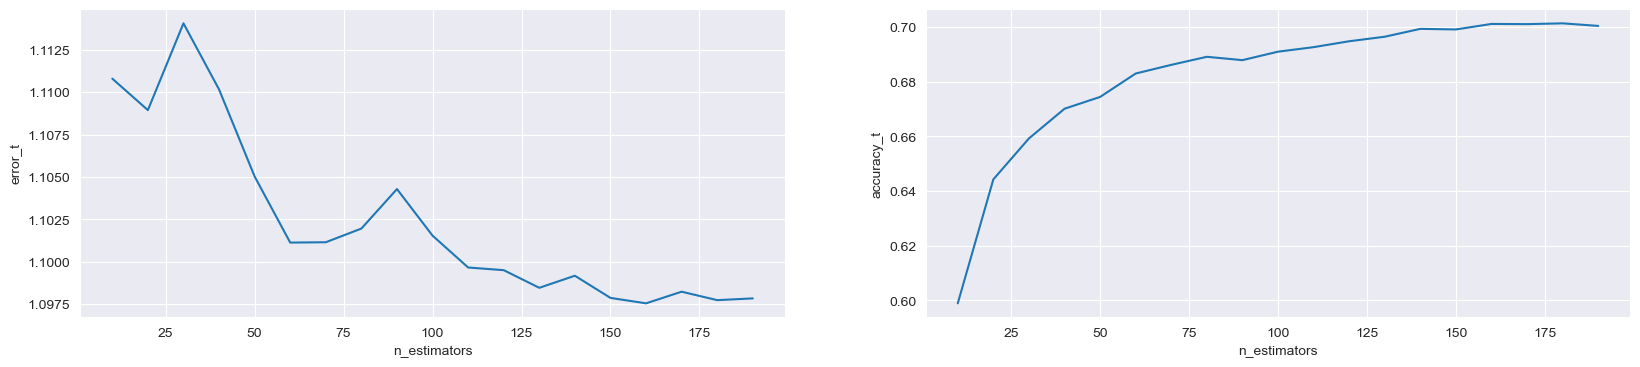

In [ ]:
# Visualize tuning results
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,4),dpi=100)
axes[0].plot(turned_parameters,error_t)
axes[1].plot(turned_parameters,accuracy_t)
axes[0].set_xlabel('n_estimators')
axes[1].set_xlabel('n_estimators')
axes[0].set_ylabel('error_t')
axes[1].set_ylabel('accuracy_t')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

Determined optimal n_estimators = 160

In [ ]:
# Model tuning
# Determine optimal max_features: first set the search range
turned_parameters=range(5,40,5)
# create numpy array to store accuracy
accuracy_t=np.zeros(len(turned_parameters))
# create numpy array to store error
error_t=np.zeros(len(turned_parameters))
for j,one_parameter in enumerate(turned_parameters):
    rf2=RandomForestClassifier(n_estimators=160,
                               max_depth=10,
                               max_features=one_parameter,
                               min_samples_leaf=10,
                               oob_score=True,
                               random_state=0,
                               n_jobs=-1)
    rf2.fit(x_train,y_train)
    accuracy_t[j]=rf2.oob_score_

    y_pre=rf2.predict_proba(x_test)
    #y_pre = one_hot.fit_transform(y_pre.reshape(-1, 1))
    error_t[j]=log_loss(y_test1,y_pre)
    print(error_t)

[1.19325786 0.         0.         0.         0.         0.
 0.        ]
[1.19325786 1.09755546 0.         0.         0.         0.
 0.        ]
[1.19325786 1.09755546 1.06730836 0.         0.         0.
 0.        ]
[1.19325786 1.09755546 1.06730836 1.05179255 0.         0.
 0.        ]
[1.19325786 1.09755546 1.06730836 1.05179255 1.03924073 0.
 0.        ]
[1.19325786 1.09755546 1.06730836 1.05179255 1.03924073 1.04046057
 0.        ]
[1.19325786 1.09755546 1.06730836 1.05179255 1.03924073 1.04046057
 1.03699841]


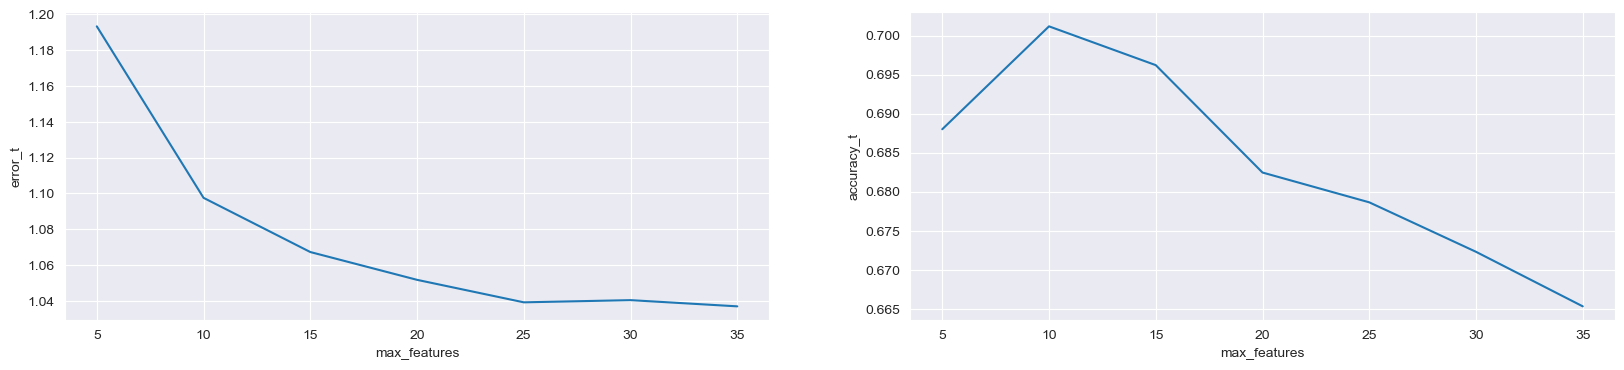

In [ ]:
# Visualize tuning results
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,4),dpi=100)
axes[0].plot(turned_parameters,error_t)
axes[1].plot(turned_parameters,accuracy_t)
axes[0].set_xlabel('max_features')
axes[1].set_xlabel('max_features')
axes[0].set_ylabel('error_t')
axes[1].set_ylabel('accuracy_t')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

# max_features = 15 performed well

In [ ]:
# Model tuning
# Determine optimal max_depth: first set the search range
turned_parameters=range(10,100,10)
# create numpy array to store accuracy
accuracy_t=np.zeros(len(turned_parameters))
# create numpy array to store error
error_t=np.zeros(len(turned_parameters))
for j,one_parameter in enumerate(turned_parameters):
    rf2=RandomForestClassifier(n_estimators=160,
                               max_depth=one_parameter,
                               max_features=15,
                               min_samples_leaf=10,
                               oob_score=True,
                               random_state=0,
                               n_jobs=-1)
    rf2.fit(x_train,y_train)
    accuracy_t[j]=rf2.oob_score_

    y_pre=rf2.predict_proba(x_test)
    #y_pre = one_hot.fit_transform(y_pre.reshape(-1, 1))
    error_t[j]=log_loss(y_test1,y_pre)
    print(error_t)

[1.06730836 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[1.06730836 0.83568448 0.         0.         0.         0.
 0.         0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.         0.         0.
 0.         0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.         0.
 0.         0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.81627884 0.
 0.         0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.81627884 0.81627884
 0.         0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.81627884 0.81627884
 0.81627884 0.         0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.81627884 0.81627884
 0.81627884 0.81627884 0.        ]
[1.06730836 0.83568448 0.81761359 0.81629169 0.81627884 0.81627884
 0.81627884 0.81627884 0.81627884]


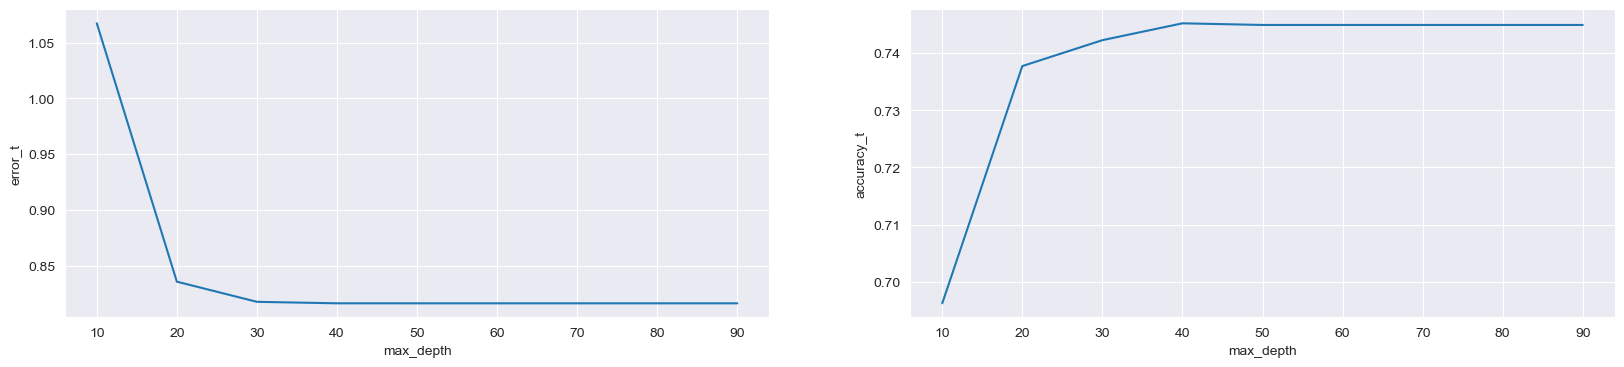

In [ ]:
# Visualize tuning results
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,4),dpi=100)
axes[0].plot(turned_parameters,error_t)
axes[1].plot(turned_parameters,accuracy_t)
axes[0].set_xlabel('max_depth')
axes[1].set_xlabel('max_depth')
axes[0].set_ylabel('error_t')
axes[1].set_ylabel('accuracy_t')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

max_depth = 30 performed well

In [ ]:
# Model tuning
# Determine optimal min_samples_leaf: first set the search range
turned_parameters=range(1,10,2)
# create numpy array to store accuracy
accuracy_t=np.zeros(len(turned_parameters))
# create numpy array to store error
error_t=np.zeros(len(turned_parameters))
for j,one_parameter in enumerate(turned_parameters):
    rf2=RandomForestClassifier(n_estimators=160,
                               max_depth=30,
                               max_features=15,
                               min_samples_leaf=one_parameter,
                               oob_score=True,
                               random_state=0,
                               n_jobs=-1)
    rf2.fit(x_train,y_train)
    accuracy_t[j]=rf2.oob_score_

    y_pre=rf2.predict_proba(x_test)
    #y_pre = one_hot.fit_transform(y_pre.reshape(-1, 1))
    error_t[j]=log_loss(y_test1,y_pre)
    print(error_t)

[0.69733141 0.         0.         0.         0.        ]
[0.69733141 0.72572299 0.         0.         0.        ]
[0.69733141 0.72572299 0.75633164 0.         0.        ]
[0.69733141 0.72572299 0.75633164 0.78548694 0.        ]
[0.69733141 0.72572299 0.75633164 0.78548694 0.80723671]


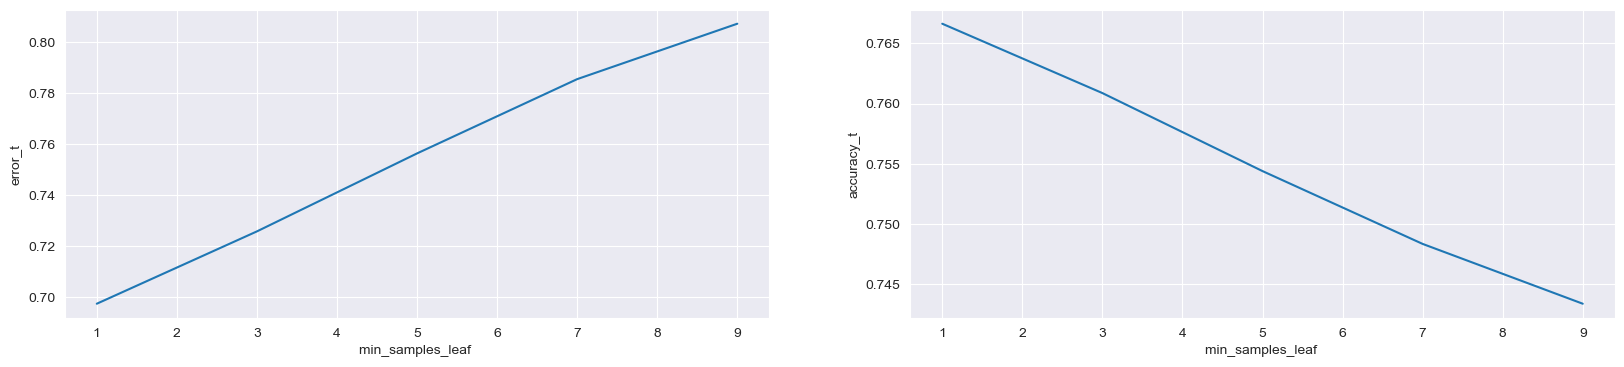

In [ ]:
# Visualize tuning results
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,4),dpi=100)
axes[0].plot(turned_parameters,error_t)
axes[1].plot(turned_parameters,accuracy_t)
axes[0].set_xlabel('min_samples_leaf ')
axes[1].set_xlabel('min_samples_leaf ')
axes[0].set_ylabel('error_t')
axes[1].set_ylabel('accuracy_t')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

min_samples_leaf = 1 performed well

# Final chosen model parameters
                                n_estimators=160,
                               max_depth=30,
                               max_features=15,
                               min_samples_leaf=1,
                               oob_score=True,
                               random_state=0,
                               n_jobs=-1

In [11]:
rf3=RandomForestClassifier(n_estimators=500, max_depth=30, max_features=15, min_samples_leaf=1, oob_score=True, random_state=40, n_jobs=-1)
rf3.fit(x_train,y_train)



RandomForestClassifier(max_depth=30, max_features=15, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=40)

In [12]:
rf3.score(x_test,y_test)


0.7918226317304924

In [13]:
rf3.oob_score_

0.7716733870967742

In [14]:
y_pre_proba=rf3.predict_log_proba(x_test)
y_proba_smooth = np.clip(y_proba, 1e-10, 1)


C:\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:994: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [15]:
log_loss(y_test1,y_proba_smooth)

0.7214318194248058

In [ ]:
# Generate submission data
test_data=pd.read_csv('test_otto.csv')
test_data_drop_id=test_data.drop(['id'],axis=1)
test_data_drop_id.shape

(144368, 93)

In [17]:
y_pre_test=rf3.predict_proba(test_data_drop_id)

y_pre_test


array([[0.014     , 0.09225628, 0.08651949, ..., 0.0340875 , 0.002     ,
        0.00804878],
       [0.04      , 0.07225806, 0.05077419, ..., 0.05819355, 0.25      ,
        0.02206452],
       [0.008     , 0.002     , 0.        , ..., 0.002     , 0.018     ,
        0.002     ],
       ...,
       [0.01502105, 0.31419373, 0.31265789, ..., 0.05819524, 0.00802105,
        0.01302105],
       [0.00214241, 0.19486913, 0.10030273, ..., 0.0101542 , 0.004     ,
        0.0050202 ],
       [0.001818  , 0.17146189, 0.39109369, ..., 0.15568744, 0.00063415,
        0.00522957]])

In [18]:
result_data=pd.DataFrame(y_pre_test,columns=["Class_"+str(i) for i in range(1,10)])
result_data.insert(0, "id", range(1, len(result_data)+1))
result_data.shape

(144368, 10)

In [19]:
result_data.to_csv('submission.csv',index=False)